# **Data in Design, AI for Urban Data and Visualization**

#### Data, Design Computation, Artificial Intelligence, Visualization, Harvard GSD J Term 2023


**KEYWORD:**
Vector, Raster, Urban Data, GIS, Data Processing, Data Mining, Machine Learning, Artificial Intelligence, Visualization, Mapping, Design Decision-Making

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

## 1 import libs and data generation for training

In [1]:
import cv2
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

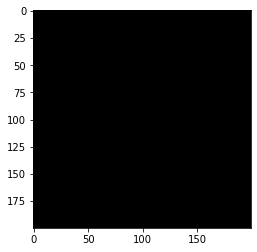

In [2]:
img = np.zeros((200, 200, 3), np.uint8)
plt.imshow(img)

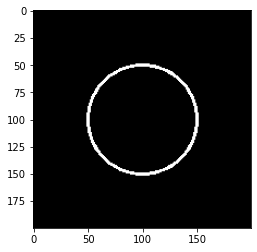

In [3]:
# https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/
imgCircle = cv2.circle(img, (100, 100), 50, (255, 255, 255), 2)
plt.imshow(imgCircle)


In [4]:
filename = 'data/imgTest/savedImage.jpg'
cv2.imwrite(filename, imgCircle)
  

## 2 Circle, Rectangle, data generation for training

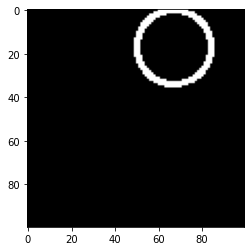

In [5]:
import random as rnd

path = 'data/img/'

observation = 1000

width = 100
height = 100


for i in range(observation):
    canvas = np.zeros((width, height, 3), np.uint8)
    x = rnd.randrange(0, width)
    y = rnd.randrange(0, height)

    r = rnd.randrange(5, ((width * 0.5) + (height * 0.5)) * 0.5 )

    if (x - r < 0):
        r = x
    if (y - r < 0):
        r = y

    if (x + r > width):
        r = width - x
    if (y + r > height):
        r = height - y


    imgCircle = cv2.circle(canvas, (x, y), r, (255, 255, 255), 2)
    plt.imshow(imgCircle)
    filename = path + 'circle_' + str(i) + '.jpg'
    cv2.imwrite(filename, imgCircle)

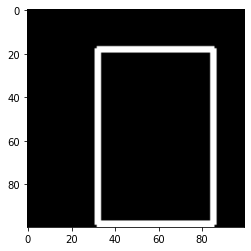

In [6]:
for i in range(observation):
    canvas = np.zeros((width, height, 3), np.uint8)
    x = rnd.randrange(0, width)
    y = rnd.randrange(0, height)

    rectWidth = rnd.randrange(0, width)
    rectHeight = rnd.randrange(0, height)

    if (x + rectWidth > width):
        rectWidth = width - x
    if (y + rectHeight > height):
        rectHeight = height - y

    imgRect = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
    plt.imshow(imgRect)
    filename = path + 'rect_' + str(i) + '.jpg'
    cv2.imwrite(filename, imgRect)



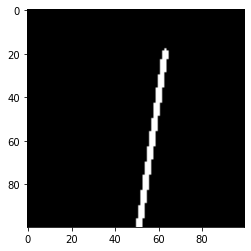

In [7]:
for i in range(observation):
    canvas = np.zeros((width, height, 3), np.uint8)
    x0 = rnd.randrange(0, width)
    y0 = rnd.randrange(0, height)

    x1 = rnd.randrange(0, width)
    y1 = rnd.randrange(0, height)

    # imgRect = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
    imgLine = cv2.line(canvas, (x0, y0), (x1, y1), (255, 255 ,255), 2 )
    plt.imshow(imgLine)
    filename = path + 'line_' + str(i) + '.jpg'
    cv2.imwrite(filename, imgLine)



## 3 Loading data & training models and validation

In [8]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input

In [9]:
CLASS_INDEX = ['Circle', 'Rectangle', 'Line']
EPOCHS = 25



In [10]:
from os import walk
import numpy as np

f = []
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)

np.random.seed(222)
np.random.shuffle(f)

print (f)  

['rect_983.jpg', 'line_256.jpg', 'rect_570.jpg', 'circle_779.jpg', 'rect_850.jpg', 'circle_811.jpg', 'line_435.jpg', 'line_148.jpg', 'rect_321.jpg', 'line_200.jpg', 'circle_215.jpg', 'rect_28.jpg', 'circle_174.jpg', 'circle_395.jpg', 'circle_71.jpg', 'rect_611.jpg', 'circle_516.jpg', 'rect_404.jpg', 'rect_713.jpg', 'circle_272.jpg', 'circle_608.jpg', 'circle_257.jpg', 'line_271.jpg', 'rect_719.jpg', 'line_251.jpg', 'rect_699.jpg', 'rect_292.jpg', 'circle_604.jpg', 'circle_322.jpg', 'rect_695.jpg', 'line_602.jpg', 'line_367.jpg', 'line_279.jpg', 'line_583.jpg', 'line_721.jpg', 'circle_620.jpg', 'rect_452.jpg', 'line_49.jpg', 'line_442.jpg', 'circle_90.jpg', 'rect_486.jpg', 'rect_817.jpg', 'circle_677.jpg', 'circle_758.jpg', 'line_978.jpg', 'circle_442.jpg', 'rect_767.jpg', 'circle_37.jpg', 'rect_206.jpg', 'line_414.jpg', 'rect_170.jpg', 'rect_217.jpg', 'circle_308.jpg', 'rect_412.jpg', 'rect_733.jpg', 'rect_60.jpg', 'rect_248.jpg', 'line_360.jpg', 'rect_79.jpg', 'rect_949.jpg', 'rect_82

In [11]:


data = []
classList = []

for i in f:
    # print(i)
    if ('cir' in i):
        classList.append(0);
    elif ('lin' in i):
        classList.append(1);
    elif ('rec' in i):
        classList.append(2);
    elif ('savedImage in i'):
        continue

    thePath = path + i
    # print(path)
    img = cv2.imread(thePath)
    # print(img.shape)
    # print(type(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    array = tf.keras.preprocessing.image.img_to_array(img).flatten()
    data.append(array)

data = np.array(data)
classList = np.array(classList)
print(data)
print(classList)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... 255. 255. 255.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[2 1 2 ... 2 0 1]


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(data, classList, test_size=0.3, random_state=0)

In [13]:
print(X_train.shape)
print(X_test.shape)

(2100, 10000)
(900, 10000)


In [14]:
X_Val = X_test[-100:]
Y_Val = Y_test[-100:]

X_test = X_test[:-100]
Y_test = Y_test[:-100]

In [15]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_Val = to_categorical(Y_Val)
print(Y_test.shape)

(800, 3)


In [16]:
model = Sequential([
  Input(shape=(100 * 100 * 1)),
  Dense(248, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(len(Y_test[1]), activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 248)               2480248   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               31872     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 2,520,571
Trainable params: 2,520,571
Non-trainable params: 0
_________________________________________________________________


In [17]:
hist = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/25
66/66 [==============================] - 29s 37ms/step - loss: 14.4417 - accuracy: 0.4914 - val_loss: 4.7950 - val_accuracy: 0.6450
Epoch 2/25
66/66 [==============================] - 1s 16ms/step - loss: 2.6136 - accuracy: 0.7866 - val_loss: 3.8434 - val_accuracy: 0.6675
Epoch 3/25
66/66 [==============================] - 1s 17ms/step - loss: 0.6804 - accuracy: 0.9111 - val_loss: 3.6334 - val_accuracy: 0.6963
Epoch 4/25
66/66 [==============================] - 1s 15ms/step - loss: 0.2479 - accuracy: 0.9615 - val_loss: 3.6440 - val_accuracy: 0.7113
Epoch 5/25
66/66 [==============================] - 1s 16ms/step - loss: 0.1018 - accuracy: 0.9862 - val_loss: 3.7368 - val_accuracy: 0.7212
Epoch 6/25
66/66 [==============================] - 1s 16ms/step - loss: 0.1132 - accuracy: 0.9735 - val_loss: 4.0310 - val_accuracy: 0.7138
Epoch 7/25
66/66 [==============================] - 1s 17ms/step - loss: 0.0651 - accuracy: 0.9915 - val_loss: 4.2423 - val_accuracy: 0.6775
Epoch 8/25


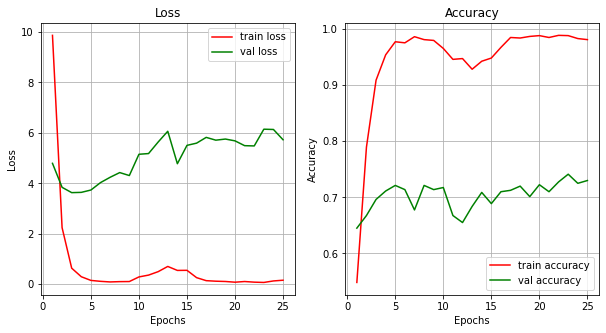

In [18]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

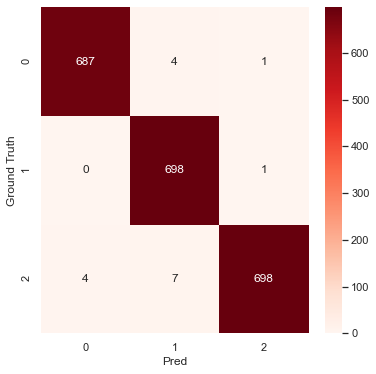

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='dark')
predY = model.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

In [20]:
data = []
classList = []

for i in f:
    if ('cir' in i):
        classList.append(0);
    elif ('lin' in i):
        classList.append(1);
    elif ('rec' in i):
        classList.append(2);
    elif ('savedImage in i'):
        continue

    thePath = path + i
    img = cv2.imread(thePath)
    array = tf.keras.preprocessing.image.img_to_array(img)
    data.append(array)

data = np.array(data)
classList = np.array(classList)
# print(data)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(data, classList, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

X_Val = X_test[-100:]
Y_Val = Y_test[-100:]

X_test = X_test[:-100]
Y_test = Y_test[:-100]

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_Val = to_categorical(Y_Val)
print(Y_test.shape)

(2100, 100, 100, 3)
(900, 100, 100, 3)
(800, 3)


In [22]:

model = Sequential([
  Flatten(input_shape=(100, 100, 3)),
  Dense(248, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(len(Y_test[1]), activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 248)               7440248   
_________________________________________________________________
dense_5 (Dense)              (None, 128)               31872     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 7,480,571
Trainable params: 7,480,571
Non-trainable params: 0
_________________________________________________________________


In [23]:
hist = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/25
66/66 [==============================] - 4s 30ms/step - loss: 28.7788 - accuracy: 0.4699 - val_loss: 14.2770 - val_accuracy: 0.5962
Epoch 2/25
66/66 [==============================] - 1s 22ms/step - loss: 7.2055 - accuracy: 0.7464 - val_loss: 9.6209 - val_accuracy: 0.6275
Epoch 3/25
66/66 [==============================] - 1s 23ms/step - loss: 2.8688 - accuracy: 0.8705 - val_loss: 9.5498 - val_accuracy: 0.6625
Epoch 4/25
66/66 [==============================] - 1s 21ms/step - loss: 1.4237 - accuracy: 0.9084 - val_loss: 9.2344 - val_accuracy: 0.6712
Epoch 5/25
66/66 [==============================] - 1s 22ms/step - loss: 1.4118 - accuracy: 0.9148 - val_loss: 9.4385 - val_accuracy: 0.6963
Epoch 6/25
66/66 [==============================] - 1s 19ms/step - loss: 0.9325 - accuracy: 0.9483 - val_loss: 7.2973 - val_accuracy: 0.7200
Epoch 7/25
66/66 [==============================] - 1s 21ms/step - loss: 0.4587 - accuracy: 0.9653 - val_loss: 8.2132 - val_accuracy: 0.7113
Epoch 8/25


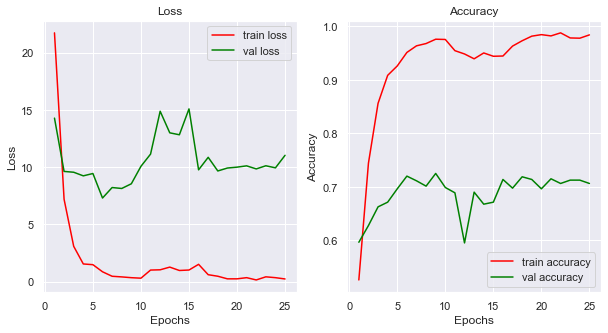

In [24]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

In [25]:
model.evaluate(X_test, Y_test)
model.evaluate(X_Val, Y_Val)

4/4 [==============================] - 1s 18ms/step - loss: 11.5286 - accuracy: 0.6900


[11.528639793395996, 0.6899999976158142]

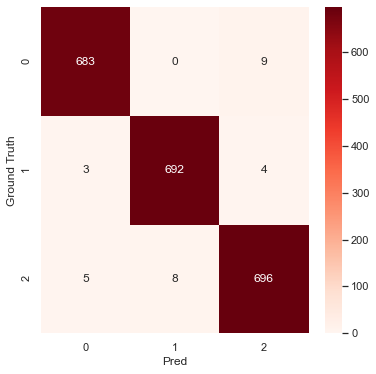

In [26]:
predY = model.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

In [27]:
from keras.layers import Dropout

In [28]:

model = Sequential([
  Flatten(input_shape=(100, 100, 3)),
  Dense(248, activation='relu'),
  Dropout(0.5),
  Dense(128, activation='relu'),
  Dropout(0.25),
  Dense(64, activation='relu'),
  Dense(len(Y_test[1]), activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()
hist = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 248)               7440248   
_________________________________________________________________
dropout (Dropout)            (None, 248)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               31872     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

4/4 [==============================] - 1s 16ms/step - loss: 1.4513 - accuracy: 0.6900


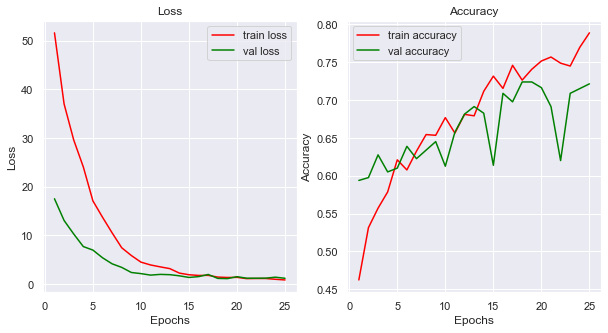

In [29]:
model.evaluate(X_test, Y_test)
model.evaluate(X_Val, Y_Val)
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

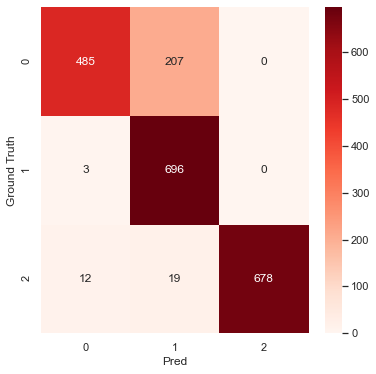

In [30]:
predY = model.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dropout, Flatten, Dense, Input

In [32]:
modelSecond = Sequential(
    [
        Input(shape=(100,100,3)),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Flatten(),
        Dense(len(Y_test[1]), activation="softmax"),
    ]
)

modelSecond.summary()
modelSecond.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
              

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [33]:
histSecond = modelSecond.fit(
    X_train, Y_train, 
    epochs = EPOCHS, batch_size=64,
    # verbose=0,
    validation_data=(X_test, Y_test)
    )


Epoch 1/25
33/33 [==============================] - 140s 3s/step - loss: 11.0012 - accuracy: 0.4662 - val_loss: 0.9874 - val_accuracy: 0.4787
Epoch 2/25
33/33 [==============================] - 52s 2s/step - loss: 0.8646 - accuracy: 0.6243 - val_loss: 0.7668 - val_accuracy: 0.6550
Epoch 3/25
33/33 [==============================] - 52s 2s/step - loss: 0.6010 - accuracy: 0.7576 - val_loss: 0.6981 - val_accuracy: 0.6862
Epoch 4/25
33/33 [==============================] - 30s 902ms/step - loss: 0.4845 - accuracy: 0.8100 - val_loss: 0.6383 - val_accuracy: 0.7337
Epoch 5/25
33/33 [==============================] - 4s 139ms/step - loss: 0.3803 - accuracy: 0.8510 - val_loss: 0.6793 - val_accuracy: 0.7462
Epoch 6/25
33/33 [==============================] - 4s 130ms/step - loss: 0.3440 - accuracy: 0.8686 - val_loss: 0.6634 - val_accuracy: 0.7600
Epoch 7/25
33/33 [==============================] - 27s 854ms/step - loss: 0.2697 - accuracy: 0.8933 - val_loss: 0.7077 - val_accuracy: 0.7425
Epoch 8/

4/4 [==============================] - 0s 93ms/step - loss: 1.5051 - accuracy: 0.7900


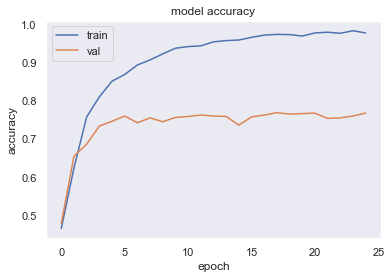

In [34]:
modelSecond.evaluate(X_train, Y_train)
modelSecond.evaluate(X_test, Y_test)
modelSecond.evaluate(X_Val, Y_Val)
plt.plot(histSecond.history['accuracy'])
plt.plot(histSecond.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

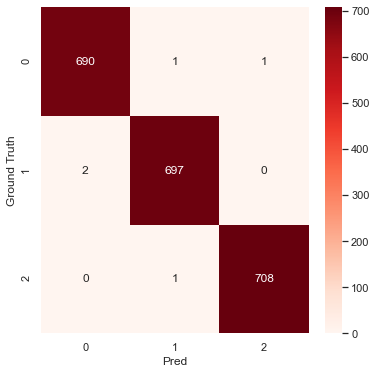

In [35]:
predY = modelSecond.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

## 5 Testing models

In [62]:
from os import walk
import numpy as np

path = 'data/imgTest/'
f = []
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)

print (f)  

['circle_01.jpg', 'circle_02.jpg', 'circle_03.jpg']


In [63]:
data = []
classList = []

for i in f:
    thePath = path + i
    img = cv2.imread(thePath)
    array = tf.keras.preprocessing.image.img_to_array(img)
    data.append(array)

data = np.array(data)
classList = np.array(classList)
# print(data)

In [64]:
results = modelSecond.predict(data)
print(results)

[[4.1718994e-15 1.0000000e+00 7.7767524e-17]
 [9.9996746e-01 3.2547981e-05 3.4945451e-08]
 [5.4028922e-01 4.5971075e-01 2.0421929e-09]]


In [65]:
for result in results:
    index = np.argmax(result)
    print(CLASS_INDEX[index], result[index])

Rectangle 1.0
Circle 0.99996746
Circle 0.5402892


In [ ]:
def getDrawing(type):
    offset = 5
    theWidth = width - offset
    theHeight = height - offset
    canvas = np.zeros(( width, height, 3), np.uint8)
    x = rnd.randrange(0, theHeight) + offset
    y = rnd.randrange(0, theHeight) + offset

    if type == 'cir':
        r = rnd.randrange(5, (int(theWidth * 0.5) + int(theHeight * 0.5)) * 0.5 )
        if (x - r < 0):
            r = x
        if (y - r < 0):
            r = y

        if (x + r > theWidth):
            r = theWidth - x
        if (y + r > theHeight):
            r = theHeight - y

        img = cv2.circle(canvas, (x, y), r, (255, 255, 255), 2)
        return img

    elif type == 'rect':
        rectWidth = rnd.randrange(0, theWidth)
        rectHeight = rnd.randrange(0, theHeight)
        if (x + rectWidth > theWidth):
            rectWidth = theWidth - x
        if (y + rectHeight > theHeight):
            rectHeight = theHeight - y
        img = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
        return img

    elif type == 'line':
        x1 = rnd.randrange(0, theWidth)
        y1 = rnd.randrange(0, theHeight)
        # imgRect = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
        img = cv2.line(canvas, (x, y), (x1, y1), (255, 255 ,255), 2 )
        return img
def img2array(img):
    return tf.keras.preprocessing.image.img_to_array(img)

shape (100, 100, 3)
[[1.0840988e-02 9.8915827e-01 6.8719902e-07]]
Rectangle 98.91582727432251
[[ 1 98  0]]


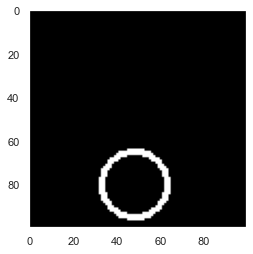

In [66]:
cir = getDrawing('cir')
plt.imshow(cir)

array = img2array(cir)
print('shape', array.shape)

result = modelSecond.predict(np.array([array]))
print(result)
index = np.argmax(result)

print(CLASS_INDEX[index], result[0][index] * 100)
print((result * 100).astype(int))

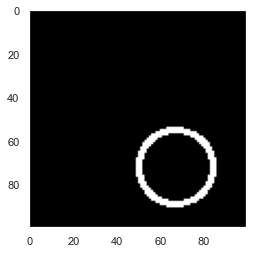

[[4.8864589e-05 9.9995112e-01 3.4882163e-11]]
Rectangle 99.99511241912842
[[ 0 99  0]]


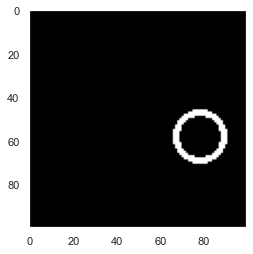

[[2.6018993e-06 9.9999738e-01 1.7827742e-10]]
Rectangle 99.99973773956299
[[ 0 99  0]]


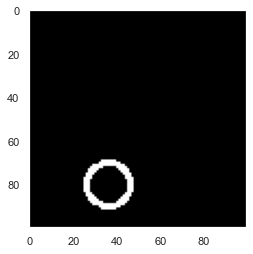

[[7.8183388e-07 9.9999905e-01 8.7759332e-08]]
Rectangle 99.99990463256836
[[ 0 99  0]]


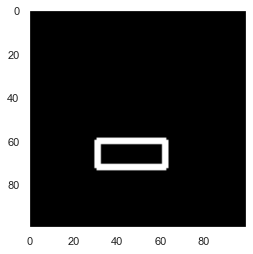

[[0.02032397 0.54331255 0.4363635 ]]
Rectangle 54.331254959106445
[[ 2 54 43]]


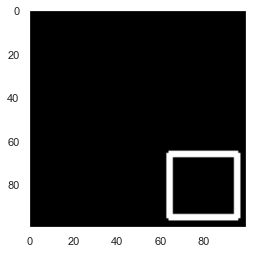

[[3.934531e-10 9.873982e-12 1.000000e+00]]
Line 100.0
[[  0   0 100]]


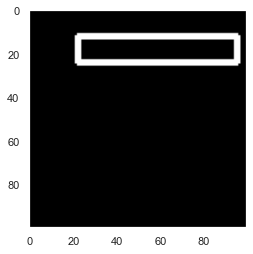

[[6.239011e-08 6.247036e-08 9.999999e-01]]
Line 99.99998807907104
[[ 0  0 99]]


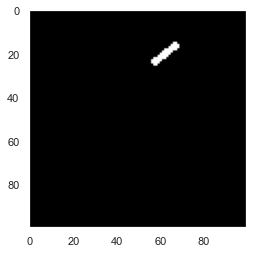

[[8.3252782e-04 9.9907720e-01 9.0317306e-05]]
Rectangle 99.90772008895874
[[ 0 99  0]]


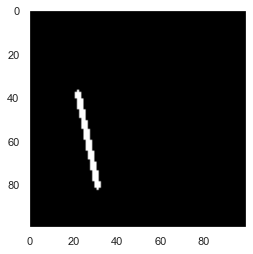

[[9.4008826e-02 9.0594864e-01 4.2529202e-05]]
Rectangle 90.59486389160156
[[ 9 90  0]]


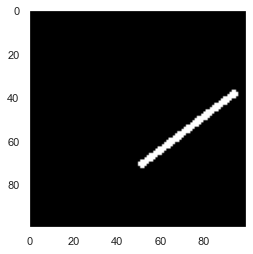

[[1.0291574e-02 9.8970836e-01 3.2500711e-08]]
Rectangle 98.97083640098572
[[ 1 98  0]]


In [69]:
def getPrediction(typeShape):
    cir = getDrawing(typeShape)
    plt.imshow(cir)
    plt.show()

    array = img2array(cir)
    # print('shape', array.shape)

    result = modelSecond.predict(np.array([array]))
    print(result)
    index = np.argmax(result)

    print(CLASS_INDEX[index], result[0][index] * 100)
    print((result * 100).astype(int))

typeShapes = ['cir', 'cir', 'cir', 'rect', 'rect', 'rect', 'line', 'line', 'line']
for t in typeShapes:
    getPrediction(t)


-----
### References & Useful links

Lee, N. (2021). Understanding and Analyzing the Characteristics of the Third Place in Urban Design: A Methodology for Discrete and Continuous Data in Environmental Design. In: Yuan, P.F., Yao, J., Yan, C., Wang, X., Leach, N. (eds) Proceedings of the 2020 DigitalFUTURES. CDRF 2020. Springer, Singapore. https://doi.org/10.1007/978-981-33-4400-6_11



Oldenburg, R., Brissett, (1982). D.: The third place. Qual. Sociol. 5(4), 265–284



Lee, Namju. (2022). Computational Design, Seoul, Bookk, https://brunch.co.kr/@njnamju/144



Lee, Namju, (2022). Discrete Urban Space and Connectivity, https://nj-namju.medium.com/discrete-urban-space-and-connectivity-492b3dbd0a81



Woo. Junghyun, (2022). Numeric Network Analysis for Pedestrians, https://axuplatform.medium.com/0-numeric-network-analysis-47a2538e636c



Lee, Namju, (2022). Computational Design Thinking for Designers, https://nj-namju.medium.com/computational-design-thinking-for-designers-68224bb07f5c



Lee, Namju. (2016). Third Place Mobility Energy Consumption Per Person, http://www.njstudio.co.kr/main/project/2016_MobilityEnergyConsumptionMITMediaLab 
